**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

#Stacking (or Stacked Generalization)
Stacking is an ensemble learning technique where the predictions of multiple models (called base models or level-0 models) are combined using another model (called a meta-model or level-1 model) to make the final prediction.

Unlike bagging or boosting, stacking doesn't average or weight predictions. Instead, it learns how to combine the outputs of the base models to improve predictive performance.

**How Does Stacking Work?**

**Train Base Models:**

Multiple base models (e.g., decision trees, SVMs, logistic regression, etc.) are trained independently on the training dataset.
Each model makes predictions on the validation data or test set.

**Generate Meta-Features:**

The predictions of the base models become the input features for the meta-model.
For classification: Predictions are typically probabilities or class labels.
For regression: Predictions are numerical values.

**Train the Meta-Model:**

A separate meta-model (e.g., logistic regression, random forest, etc.) is trained using the meta-features (predictions of base models) to make the final prediction.

**Final Prediction:**

During testing, base models make predictions on new data, and the meta-model combines these predictions to provide the final output.

**Key Points:**

Base Models: Can be diverse (e.g., tree-based, linear, or neural networks).

Meta-Model: Should be simple (e.g., logistic regression, linear regression) to avoid overfitting.

Diversity: Stacking works best when base models capture different aspects of the data.

**Example Workflow:**
For a classification task:

Split the dataset into training, validation, and testing sets.
Train multiple base models on the training set (e.g., decision tree, SVM, and k-NN).
Use the validation set to collect predictions from base models.
Use these predictions as inputs to train a meta-model.
During testing, base models make predictions on test data, and the meta-model combines them to make the final prediction.

#How Many Base Models to Use?
There’s no hard and fast rule, but here are some considerations:

**Diversity is Key:**

The strength of stacking lies in combining diverse base models. Models should make different types of errors so that the meta-model can learn how to weigh their predictions effectively.

**Examples:**

Decision trees (e.g., Random Forest)
Linear models (e.g., Logistic Regression, Ridge Regression)
Non-linear models (e.g., Support Vector Machines, Neural Networks)

**Too Few Models:**

If you use only a few base models (e.g., 2), there’s limited information for the meta-model to learn from.
A common starting point is 3–5 base models.

**Too Many Models:**

Adding too many base models can increase complexity and risk overfitting the meta-model.
Ensure that each base model adds value (e.g., better performance or unique insights).
How to Select the Meta-Model?

**Simple Models Work Well:**

Since the meta-model only needs to combine predictions from base models,

simpler models like:

Logistic Regression (for classification)
Linear Regression (for regression tasks)
Ridge or Lasso Regression (to reduce overfitting if many base models are used)
These models tend to perform well as meta-models.

**Experiment with More Complex Models:**

If the base models' predictions have complex relationships, try:

Gradient Boosting (e.g., XGBoost, LightGBM)
Neural Networks (if you have sufficient data and computational resources)
Use Cross-Validation for Meta-Model Selection:

Train multiple meta-models (e.g., Logistic Regression, Gradient Boosting) and evaluate their performance using a validation set or cross-validation.

In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier


In [2]:
#creating dummy data for classification
X,y = make_classification(n_samples=1000, n_features=20, n_redundant=5, random_state = 42)

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#define the base models
base_models=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [7]:
#define meta model
meta_model=LogisticRegression()

In [8]:
#define stacking classifier
stacking_clf= StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [9]:
#train the model
stacking_clf.fit(X_train,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [10]:

#make predictions
y_pred=stacking_clf.predict(X_test)

In [11]:
#evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print("accuracyp:",accuracy)

cls_rp=classification_report(y_test,y_pred)
print("classification_report:",cls_rp)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


accuracyp: 0.93
classification_report:               precision    recall  f1-score   support

           0       0.91      0.97      0.94       111
           1       0.96      0.88      0.92        89

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix:
[[108   3]
 [ 11  78]]


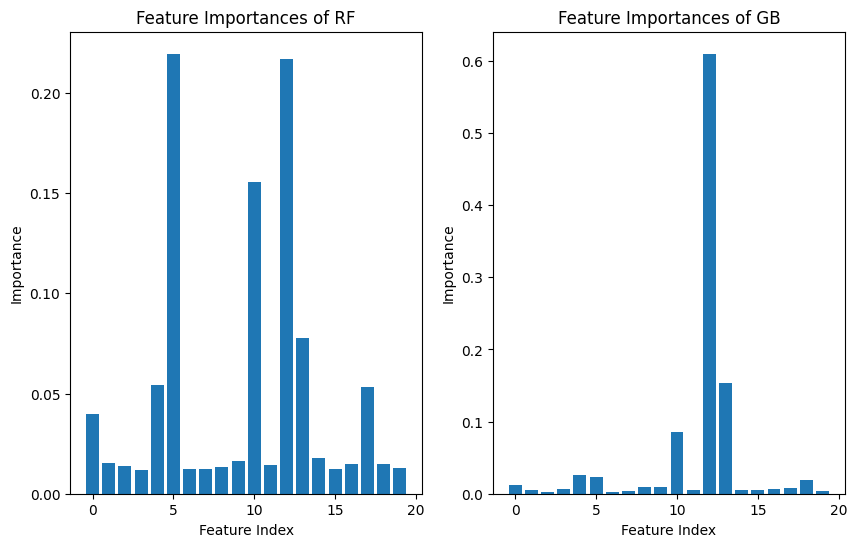

In [12]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), rf.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances of RF")

plt.subplot(1, 2, 2)
plt.bar(range(X.shape[1]), gb.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances of GB")
plt.show()


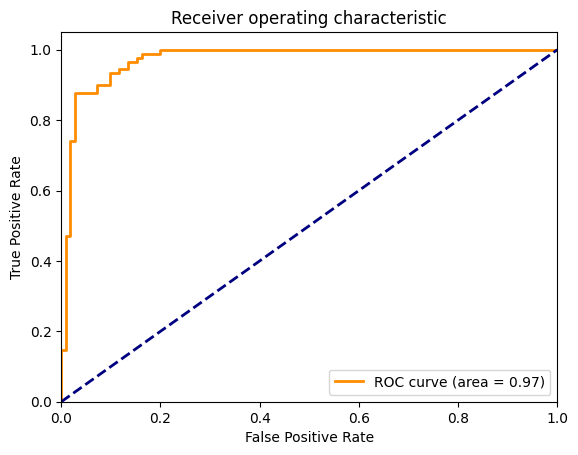

In [13]:
# Plot the ROC curve of the stacking classifier
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, stacking_clf.predict_proba(X_test)[:, 1])
auc_value = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**WE CAN FINETUNE THE MODEL FURTHER BY HYPERPARAMETER TUNING USING GRIDSEARCH ,  I LEAVE IT HERE AS ITS JUST A BASIC IMPLEMENTATION.**